In [3]:
#matplotlib.pyplot is a core visualization library.  
#seaborn gives some more powerful and complex visualization options

import matplotlib.pyplot as plt
import seaborn as sns

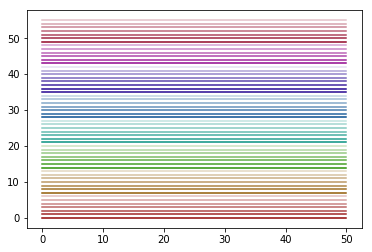

In [6]:
#Handy list of colors.  There's probably a better way to accomplish this, but I did it this way and it works reasonably well

my_colors = ['#900303', '#9e2323', '#ac4242', '#ba6262', '#c88181', '#d5a1a1', '#e3c0c0',  
             '#905903', '#9e6e23', '#ac8342', '#ba9762', '#c8ac81', '#d5c1a1', '#e3d6c0',  
             '#299003', '#449e23', '#5fac42', '#79ba62', '#94c881', '#afd5a1', '#cae3c0', 
             '#03907f', '#239e8f', '#42ac9f', '#62baaf', '#81c8bf', '#a1d5cf', '#c0e3df',  
             '#034c90', '#23629e', '#4279ac', '#628fba', '#81a6c8', '#a1bcd5', '#c0d2e3',  
             '#230390', '#230390', '#3f239e', '#5a42ac', '#7662ba', '#9181c8', '#ada1d5',  
             '#e4e0f1', '#90038c', '#9e239a', '#ac42a9', '#ba62b7', '#c881c6', '#d5a1d4',
             '#900325', '#9e2340', '#ac425c', '#ba6277', '#c88192', '#d5a1ad', '#e3c0c8',]

#plotting multiple lines of different colors
for i, col in enumerate(my_colors):
    plt.plot([0,50], [i,i], color=col)

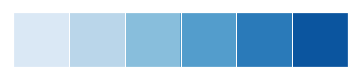

In [42]:
#look at a color palette in seaborn
sns.palplot(sns.color_palette("Blues"))

#source: https://seaborn.pydata.org/tutorial/color_palettes.html

In [64]:
#get a standard color map
viridis = plt.get_cmap('viridis')
viridis(1)

#source: https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

(0.26851, 0.009605, 0.335427, 1.0)

In [ ]:
#function for creating many individual plots based on a list
#df is a datframe, x_var and y_var should be strings, plot_list should be a list of strings
def multiple_plots_by_list(df, plot_list, x_var, y_var):
    #sets up the boundaries of the plot grid
    rows = int(len(category)/3)+1
    plt.figure(figsize=(20,rows*5))
    
    #constructs the individual plots
    for i, name in enumerate(plot_list):
        plt.subplot(rows,3,i+1)
        plt.plot(list(df[df["name column"] == name][x_var]), 
             list(df[df["name column"] == name][y_var]), color = "black")
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.title(plot_list[i])

#source: me

In [ ]:
#plot a histogram
plt.hist(df["variable of interest"])
plt.title("Distribution of Variable of Interest Values")

#source: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
#two ways to determine a plot size
plt.figure(figsize=(20,20))
plt.rcParams["figure.figsize"] = [40,20]

#sources: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
#         https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.RcParams

In [ ]:
#code to plot percentiles over time

#generate a list of years
years = []
for i in df["year"]:
    if i not in years:
        years.append(i)

#set up the frame
plt.figure(figsize=(10,5))        

#plot each percentile line
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    plt.plot(years, [np.percentile(df[df["year"]==year]['variable of interest'], i) for year in years], 
         color = my_colors[int(i/10*2)], label = str(i) + " percentile")

#plot the labels
plt.ylabel("Income")
plt.xlabel("Year")
plt.title("Income Distribution over Time")
plt.legend(loc="best")


In [ ]:
#scatterplots using pyplot
plt.scatter(list1, list2, s=1)

#scatterplots using Seaborn
sns.scatterplot(x='var1', y='var2', data=df, marker="o", s=800, color="Green")

#multiple scatterplots using Seaborn
plt.rcParams["figure.figsize"] = [80,35]
for i, cat in category_list:
    df_temp = df.loc[df['category'] == cat]
    plt.subplot(2, 4, i+1)
    plt.title(cat)
    sns.scatterplot(x='var1', y='var2', data=df_temp)

#source: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
#        https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Text(0.5,1,'example bar graph')

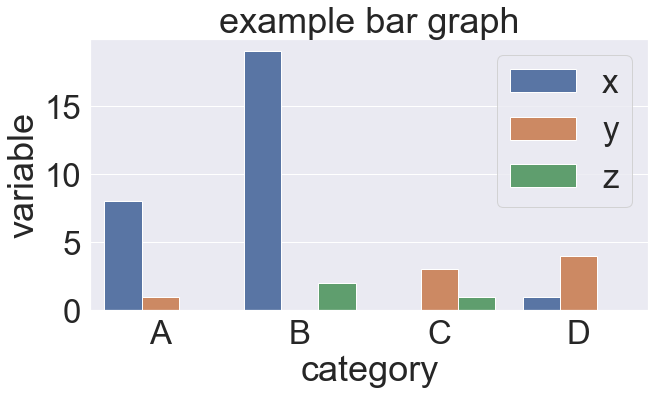

In [12]:
#barplots in sns

#df for example
import pandas as pd
df = pd.DataFrame({"category":["A", "A", "B", "B", "C", "C", "D", "D"],
                   "variable":[8, 1, 2, 19, 3, 1, 1, 4],
                   "category2":["x", "y", "z", "x", "y", "z", "x", "y"]})

#set font scale in sns
sns.set(font_scale=3)

#plot barplot
plt.figure(figsize=(10,5))
sns.barplot(x='category', y='variable', data=df, hue='category2')
plt.legend(loc="best")
plt.title("example bar graph")

#sources: https://seaborn.pydata.org/generated/seaborn.barplot.html

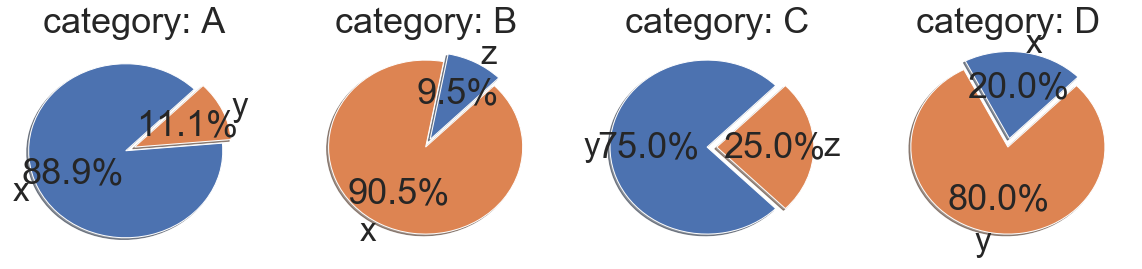

In [41]:
#pie charts in pyplot
plt.rcParams["figure.figsize"] = [20,4]
for i, cat in enumerate(category):
    data = df[df['category']==cat]['variable'].drop_duplicates().tolist()
    plt.subplot(1, 4, i+1)
    plt.title("category: " + cat)
    plt.pie(data, explode=(0.1,0), labels=df[df['category']==cat]['category2'].drop_duplicates().tolist(), shadow=True, autopct='%1.1f%%', startangle=45)
        
#Sources: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

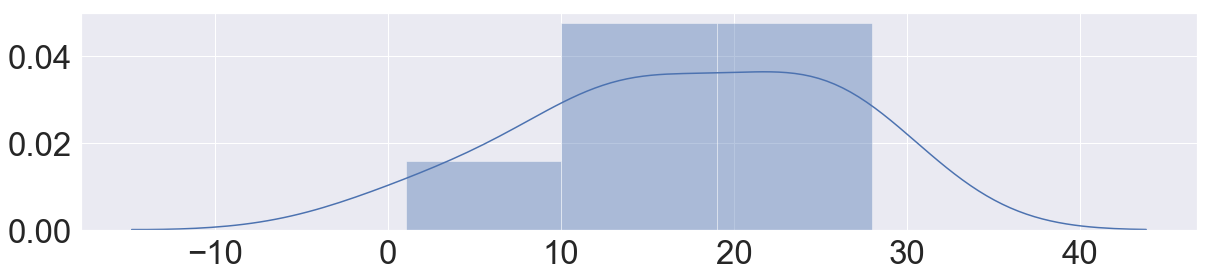

In [44]:
#Distribution plot - histogram with kdeplot - in seaborn
sns.distplot([1, 12, 12, 11, 23, 5, 23, 25, 26, 27, 28, 15, 16, 17])

#https://seaborn.pydata.org/generated/seaborn.distplot.html

Text(0.5,0.98,'here is a title!')

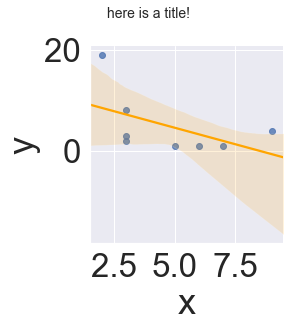

In [50]:
#linear model plot in seaborn

import pandas as pd
df = pd.DataFrame({"x":[3, 7, 3, 2, 3, 5, 6, 9],
                   "y":[8, 1, 2, 19, 3, 1, 1, 4],
                   "class": ["x", "y", "z", 'x', 'y', 'z', 'x', 'y']})

g = sns.lmplot(x="x", y="y", data=df , palette="Green", line_kws={'color': 'orange'})
g.fig.suptitle('here is a title!', fontsize=14)

#source: https://seaborn.pydata.org/generated/seaborn.lmplot.html

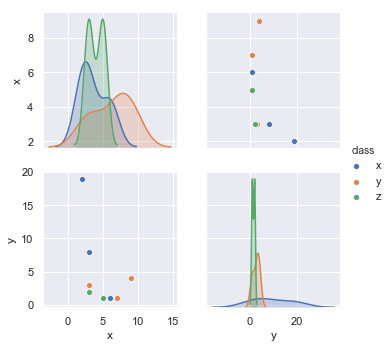

In [54]:
#Pairplot in seaborn
sns.set(font_scale=1)
sns.pairplot(data=df, hue='class')

#source: https://seaborn.pydata.org/generated/seaborn.pairplot.html

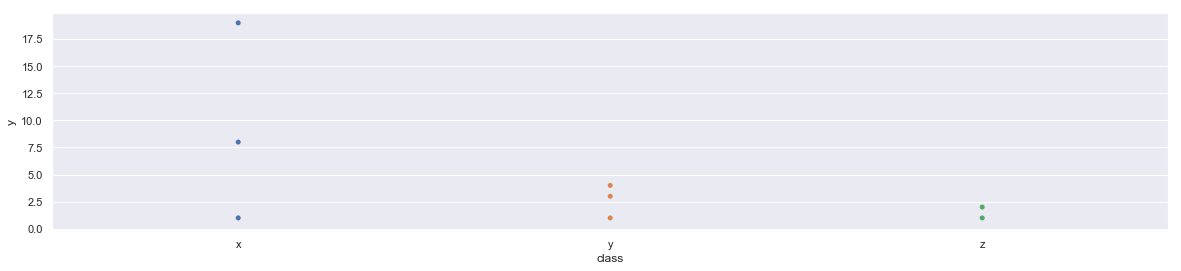

In [65]:
#swarmplot in sns
sns.swarmplot(x='class', y='y', data=df)

#source https://seaborn.pydata.org/generated/seaborn.swarmplot.html